In [71]:
from tensorflow.keras.applications import vgg16
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator, img_to_array
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

import numpy as np
import tensorflow as tf

In [45]:
# 원본 이미지를 다양하게 변형해 좀 더 잘 분류하기 위한 목적

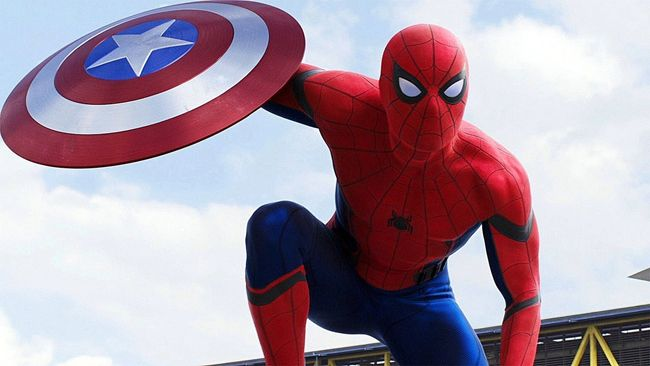

In [46]:
s = load_img('./data/image/spider.jpg')
s

In [47]:
dataGen = ImageDataGenerator(horizontal_flip = True, vertical_flip = True, shear_range = 0.5,
                            brightness_range=[0.5,1.5], zoom_range = 0.2,
                            width_shift_range= 0.1, height_shift_range=0.1,
                            rotation_range= 30, fill_mode='nearest')

In [49]:
imgArr = img_to_array(s)/255
imgArr.shape

(366, 650, 3)

In [50]:
imgArr = imgArr.reshape(1,366,650,3)
imgArr.shape

(1, 366, 650, 3)

In [51]:
imageGen = dataGen.flow(imgArr)

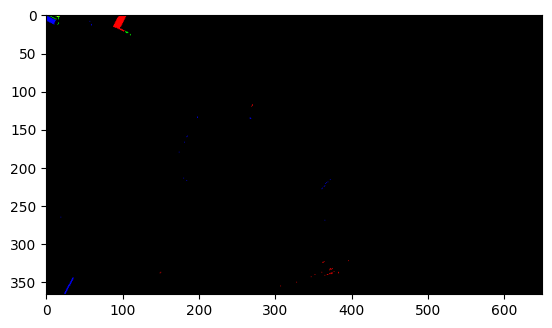

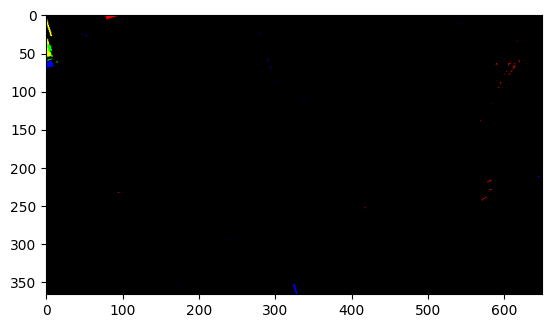

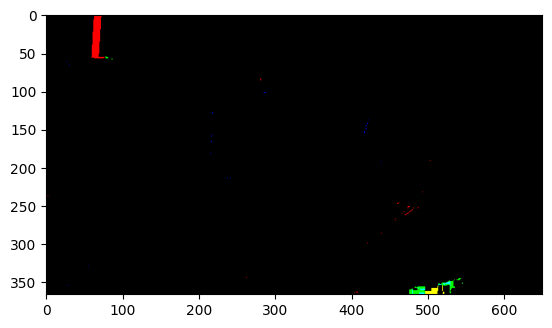

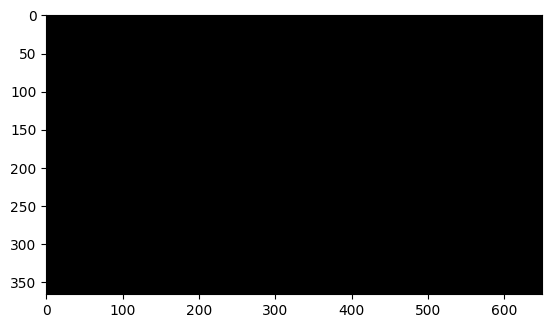

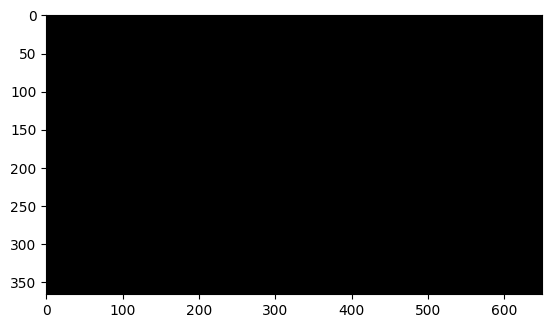

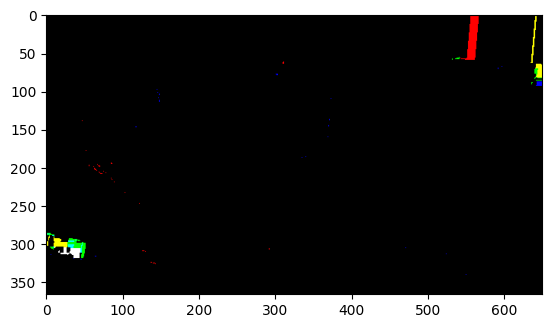

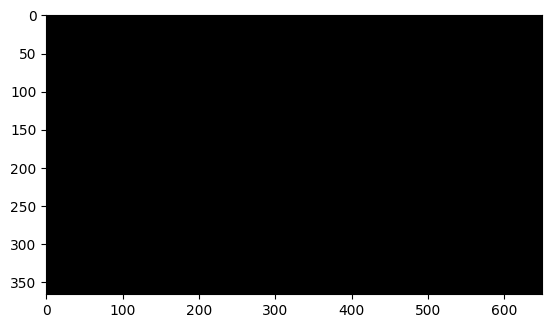

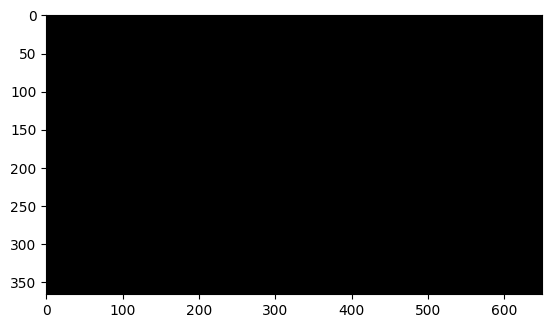

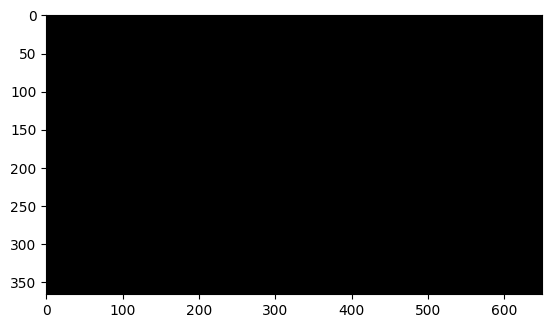

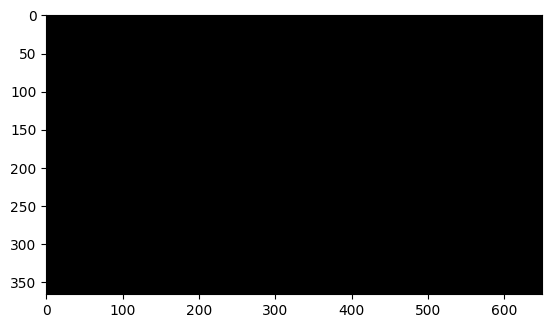

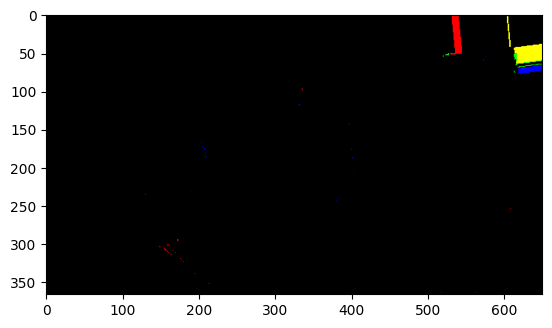

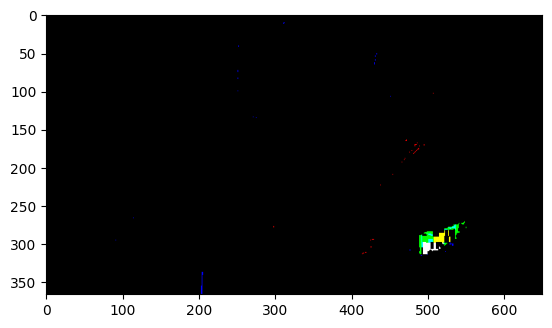

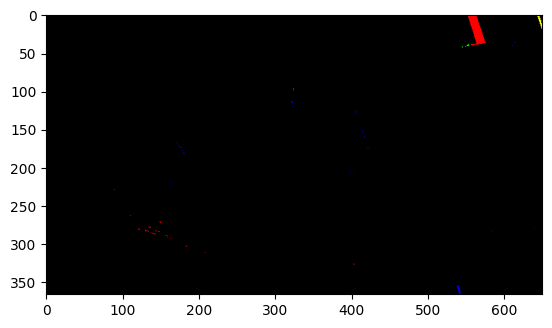

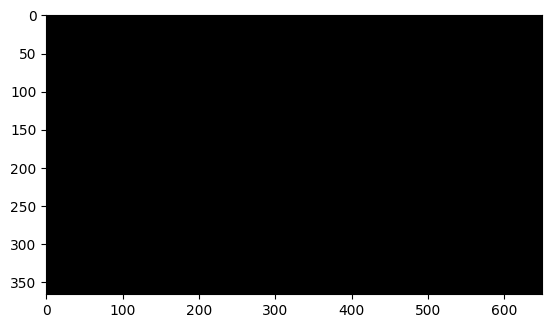

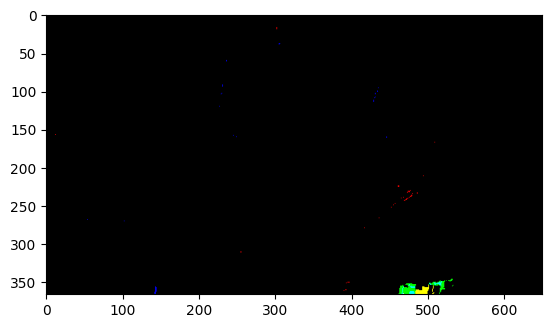

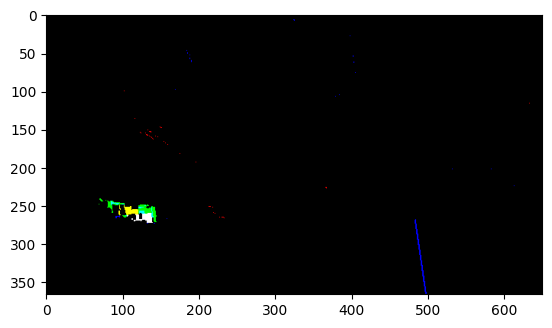

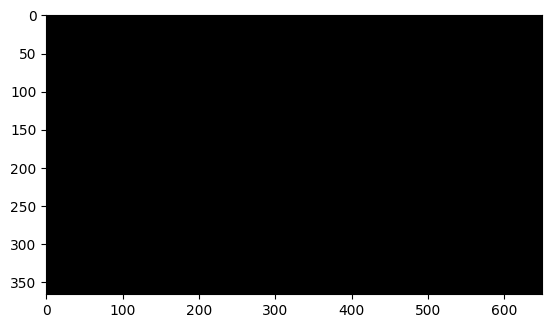

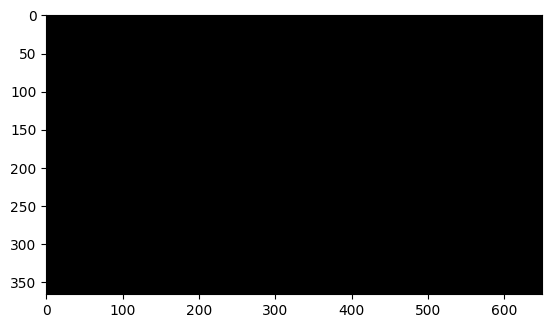

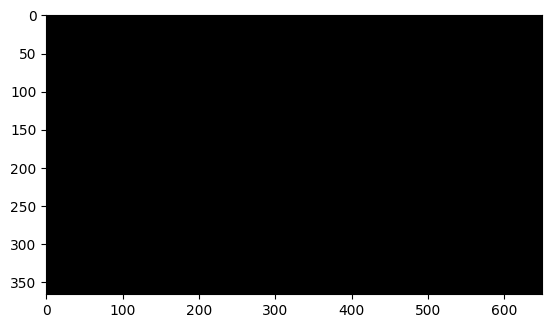

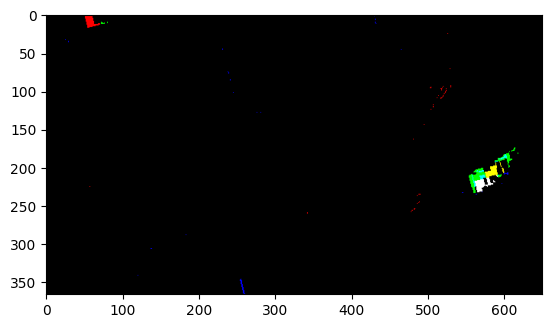

In [53]:
for n in range(20):
    img = imageGen.next()
    plt.imshow(img[0])
    plt.show()

In [72]:
from tensorflow.keras.datasets.fashion_mnist import load_data

In [73]:
(X_train, y_train), (X_test, y_test) = load_data()

In [74]:
y_trainOne = to_categorical(y_train)

In [75]:
dataGen = ImageDataGenerator(rescale = 1/255., horizontal_flip = True, vertical_flip = True, 
                             shear_range = 0.5,brightness_range=[0.5,1.5], zoom_range = 0.2,
                            width_shift_range= 0.1, height_shift_range=0.1,
                            rotation_range= 30, fill_mode='nearest')

In [76]:
trainGen = dataGen.flow(X_train.reshape(-1,28,28,1), y_trainOne)

In [78]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), strides=1, input_shape=(28,28,1),
                 activation='relu', padding='same'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add( MaxPool2D( pool_size=(2,2 ) ) )
model.add( Flatten()) 
model.add( Dense( units=64, activation='relu'))
model.add( Dense( units=10, activation='softmax'))
model.compile( loss='categorical_crossentropy', optimizer='adam', 
              metrics=['acc'] )
model.fit( trainGen, epochs= 5)

Epoch 1/5
1875/1875 [==============================] - 82s 43ms/step - loss: 0.9047 - acc: 0.6637
Epoch 2/5
1875/1875 [==============================] - 84s 45ms/step - loss: 0.6780 - acc: 0.7448
Epoch 3/5
1875/1875 [==============================] - 85s 46ms/step - loss: 0.6094 - acc: 0.7693
Epoch 4/5
1875/1875 [==============================] - 86s 46ms/step - loss: 0.5797 - acc: 0.7806
Epoch 5/5
1875/1875 [==============================] - 95s 51ms/step - loss: 0.5513 - acc: 0.7939
